In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/sansk/OneDrive/Desktop/CapstoneCombine/extracted_1.csv') 

In [3]:
y = data.iloc[:, -1]  # Last column is the class column

# Drop the name columns (first two columns)
X = data.iloc[:, 2:-1]  # Exclude the first two columns and the last column

In [4]:
# Encode class labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
# Step 2: Preprocess Categorical Features (if any)
# If you have categorical features, one-hot encode them
#categorical_cols = ['categorical_column1', 'categorical_column2']  # Replace with your categorical column names
#X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#Step 3: Impute Missing Values
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed
X = imputer.fit_transform(X)

E:\Anaconda\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [6]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

In [7]:
print(feature_importances)

[0.01374446 0.13683165 0.13425247 0.12228429 0.00907611 0.00459545
 0.01684838 0.04440821 0.04300505 0.03393333 0.00533374 0.01450043
 0.01542314 0.05627629 0.05149576 0.04083273 0.00618621 0.00487682
 0.01169221 0.03020201 0.02777152 0.04122789 0.00582594 0.0120665
 0.00672769 0.0316913  0.02703466 0.03360148 0.00778415 0.01047014]


In [8]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rf, threshold='median')  # You can adjust the threshold as needed
selector.fit(X, y)
X_selected = selector.transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)


In [10]:
print(predictions)

['Class 1' 'Class 4' 'Class 5' 'Class 4' 'Class 4' 'Class 4' 'Class 5'
 'Class 5' 'Class 1' 'Class 2' 'Class 2' 'Class 1' 'Class 5' 'Class 4'
 'Class 4' 'Class 4' 'Class 1' 'Class 5' 'Class 5' 'Class 3' 'Class 4'
 'Class 5' 'Class 5' 'Class 5' 'Class 1' 'Class 1' 'Class 5' 'Class 1'
 'Class 2' 'Class 1' 'Class 5' 'Class 1' 'Class 2' 'Class 5' 'Class 5'
 'Class 5' 'Class 2' 'Class 2' 'Class 3' 'Class 5' 'Class 3' 'Class 5'
 'Class 1' 'Class 3' 'Class 1' 'Class 4' 'Class 3' 'Class 3' 'Class 4']


In [10]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9183673469387755


In [12]:
confusion = confusion_matrix(y_test, predictions)

In [15]:
print(confusion)

[[24  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  1  9  0  1]
 [ 0  0  1 13  2]
 [ 1  0  1  1 33]]


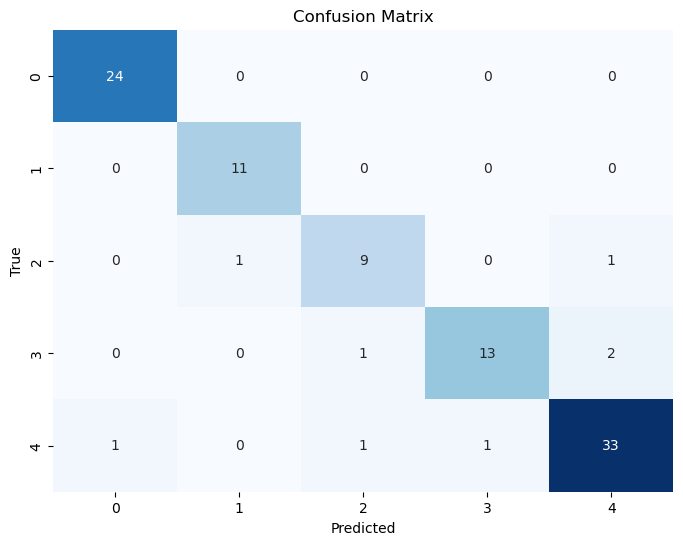

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.96      1.00      0.98        24
     Class 2       0.92      1.00      0.96        11
     Class 3       0.82      0.82      0.82        11
     Class 4       0.93      0.81      0.87        16
     Class 5       0.92      0.92      0.92        36

    accuracy                           0.92        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.92      0.92      0.92        98



In [13]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# You can also print a classification report for more detailed metrics
report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9183673469387755
Precision: 0.9181681243926142
Recall: 0.9183673469387755
F1-Score: 0.9173327538646338
